In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [104]:
salary=pd.read_csv("Salary.csv")

In [105]:
salary.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [106]:
salary.shape

(2639, 13)

In [107]:
salary.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [150]:
salary.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Years of Experience,RATING_EXP_INTERACTION,Experience in Months
count,2636.000000,2638.000000,2636.000000,2636.000000,2637.000000,2638.000000,2638.000000,2637.000000,2638.000000
mean,24.756449,58124.900303,22.501517,7.501138,3.486159,1.564822,2.193661,5.575275,26.323927
std,3.908228,36878.983630,4.604469,4.602821,1.114933,2.726881,0.898786,10.426823,10.785429
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,0.934247,0.000000,11.210959
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000,1.505479,0.000000,18.065753
50%,24.000000,46780.000000,22.000000,8.000000,3.000000,1.000000,2.093151,2.000000,25.117808
75%,25.000000,51379.250000,26.000000,11.000000,4.000000,2.000000,2.676712,6.000000,32.120548
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,6.958904,95.000000,83.506849


In [151]:
salary.isnull().sum()

FIRST NAME                0
LAST NAME                 1
SEX                       0
DOJ                       0
CURRENT DATE              0
DESIGNATION               0
AGE                       2
SALARY                    0
UNIT                      0
LEAVES USED               2
LEAVES REMAINING          2
RATINGS                   1
PAST EXP                  0
Years of Experience       0
RATING_EXP_INTERACTION    1
Experience in Months      0
dtype: int64

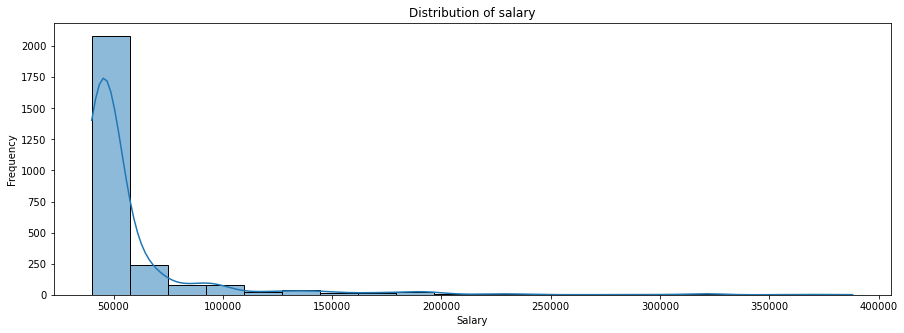

In [152]:
plt.figure(figsize=(15,5))
sns.histplot(salary['SALARY'],bins=20,kde=True)
plt.title("Distribution of salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

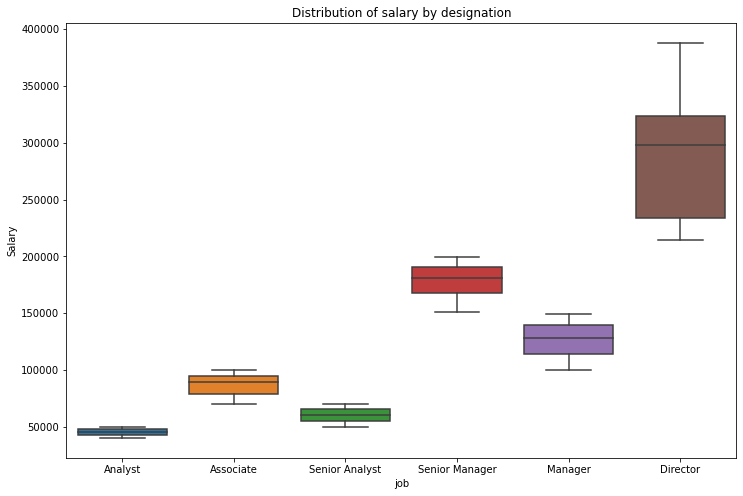

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x='DESIGNATION',y='SALARY',data=salary)
plt.title("Distribution of salary by designation")
plt.xlabel('job')
plt.ylabel('Salary')
plt.show()

                       AGE    SALARY  LEAVES USED  LEAVES REMAINING   RATINGS  \
AGE               1.000000  0.872213     0.007825         -0.006515  0.036801   
SALARY            0.872213  1.000000     0.006498         -0.005422  0.020248   
LEAVES USED       0.007825  0.006498     1.000000         -1.000000  0.002200   
LEAVES REMAINING -0.006515 -0.005422    -1.000000          1.000000 -0.003415   
RATINGS           0.036801  0.020248     0.002200         -0.003415  1.000000   
PAST EXP          0.903926  0.854046     0.008601         -0.006728  0.040123   

                  PAST EXP  
AGE               0.903926  
SALARY            0.854046  
LEAVES USED       0.008601  
LEAVES REMAINING -0.006728  
RATINGS           0.040123  
PAST EXP          1.000000  


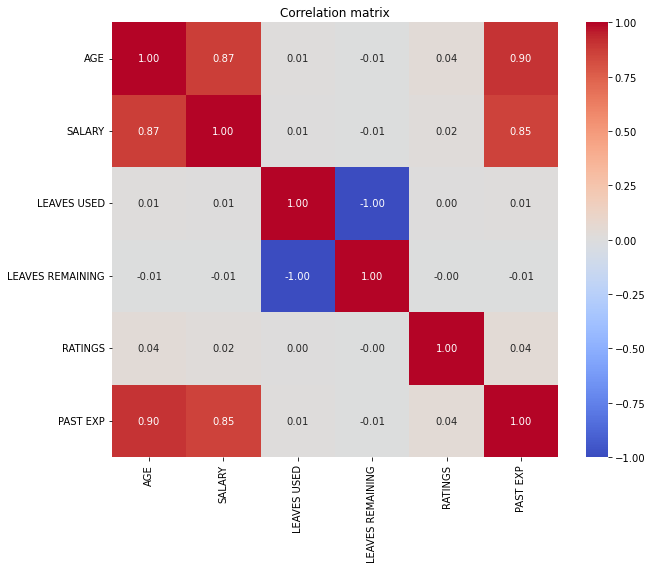

In [10]:
correlation_matrix=salary.corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

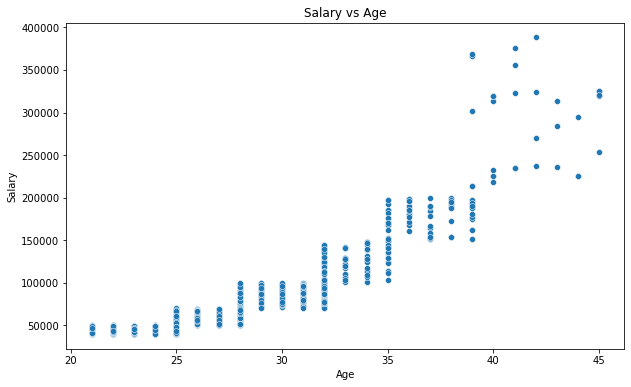

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=salary)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [157]:
z_scores=stats.zscore(salary["SALARY"])
# print("score of z: ",z_scores)
threshold = 3

# Step 3: Filter out the outliers
salary_no_outliers = salary[abs(z_scores) <= threshold]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(salary) - len(salary_no_outliers)}")

# Optionally, you can display the cleaned DataFrame
print("Data without outliers:")
print(salary_no_outliers)

Number of outliers removed: 76
Data without outliers:
     FIRST NAME   LAST NAME SEX        DOJ CURRENT DATE DESIGNATION   AGE  \
0        TOMASA       ARMEN   F 2014-05-18   2016-01-07     Analyst  21.0   
2         OLIVE        ANCY   F 2014-07-28   2016-01-07     Analyst  21.0   
3        CHERRY     AQUILAR   F 2013-04-03   2016-01-07     Analyst  22.0   
4          LEON  ABOULAHOUD   M 2014-11-20   2016-01-07     Analyst   NaN   
5      VICTORIA         NaN   F 2013-02-19   2016-01-07     Analyst  22.0   
...         ...         ...  ..        ...          ...         ...   ...   
2633      ALENE    ARILDSEN   F 2014-08-20   2016-01-07     Analyst  24.0   
2635     LOUISE     ALTARAS   F 2014-01-14   2016-01-07     Analyst  23.0   
2636      RENEE      ALVINO   F 2014-01-23   2016-01-07     Analyst  21.0   
2637       TERI   ANASTASIO   F 2014-03-17   2016-01-07     Analyst  24.0   
2638    GREGORY      ABARCA   M 2014-09-18   2016-01-07     Analyst  24.0   

      SALARY        U

In [158]:
#feature Engineering
salary["DOJ"]=pd.to_datetime(salary['DOJ'])
salary["CURRENT DATE"]=pd.to_datetime(salary["CURRENT DATE"])
salary.dtypes

FIRST NAME                        object
LAST NAME                         object
SEX                               object
DOJ                       datetime64[ns]
CURRENT DATE              datetime64[ns]
DESIGNATION                       object
AGE                              float64
SALARY                             int64
UNIT                              object
LEAVES USED                      float64
LEAVES REMAINING                 float64
RATINGS                          float64
PAST EXP                           int64
Years of Experience              float64
RATING_EXP_INTERACTION           float64
Experience in Months             float64
dtype: object

In [159]:
salary["Years of Experience"]=(salary["CURRENT DATE"]-salary["DOJ"]).dt.days/365
salary["Years of Experience"]

0       1.641096
2       1.446575
3       2.764384
4       1.131507
5       2.882192
          ...   
2634    4.531507
2635    1.980822
2636    1.956164
2637    1.810959
2638    1.304110
Name: Years of Experience, Length: 2638, dtype: float64

In [160]:
salary["Years of Experience"].isnull().value_counts()
salary=salary.dropna(subset=["Years of Experience"])

In [120]:
sal_encod=pd.get_dummies(salary,columns=["SEX","DESIGNATION","UNIT"],drop_first=True)
sal_encod

,FIRST NAME,LAST NAME,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,...,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,TOMASA,ARMEN,2014-05-18,2016-01-07,21.0,44570,24.0,6.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,OLIVE,ANCY,2014-07-28,2016-01-07,21.0,40955,23.0,7.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHERRY,AQUILAR,2013-04-03,2016-01-07,22.0,45550,22.0,8.0,3.0,0,...,0,0,0,0,0,1,0,0,0,0
4,LEON,ABOULAHOUD,2014-11-20,2016-01-07,NaN,43161,27.0,3.0,NaN,3,...,0,0,0,0,0,0,0,0,1,0
5,VICTORIA,NaN,2013-02-19,2016-01-07,22.0,48736,20.0,10.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,2011-06-28,2016-01-07,36.0,185977,15.0,15.0,5.0,10,...,0,0,0,0,1,0,1,0,0,0
2635,LOUISE,ALTARAS,2014-01-14,2016-01-07,23.0,45758,17.0,13.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
2636,RENEE,ALVINO,2014-01-23,2016-01-07,21.0,47315,29.0,1.0,5.0,0,...,0,0,0,0,0,0,0,0,0,1
2637,TERI,ANASTASIO,2014-03-17,2016-01-07,24.0,45172,23.0,7.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [121]:
salary['RATING_EXP_INTERACTION'] = salary['RATINGS'] * salary['PAST EXP']

In [163]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
salary_scaled = salary.copy()  # Create a copy of the DataFrame
salary_scaled[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']] = scaler.fit_transform(salary[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']])
salary_scaled[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']]

,AGE,LEAVES USED,LEAVES REMAINING,PAST EXP
0,-0.961347,0.325503,-0.326196,-0.573959
2,-0.961347,0.108281,-0.108897,-0.573959
3,-0.705428,-0.108940,0.108402,-0.573959
4,NaN,0.977167,-0.978094,0.526407
5,-0.705428,-0.543383,0.543001,-0.573959
...,...,...,...,...
2634,2.877438,-1.629491,1.629498,3.093929
2635,-0.449509,-1.195048,1.194899,-0.573959
2636,-0.961347,1.411610,-1.412693,-0.573959
2637,-0.193590,0.108281,-0.108897,-0.207170


In [165]:
scaler=MinMaxScaler()
salary_scaled=salary_scaled.copy()
salary_scaled[['AGE', 'SALARY', 'Years of Experience']] = scaler.fit_transform(salary_scaled[['AGE', 'SALARY', 'Years of Experience']])
salary_scaled[['AGE', 'SALARY', 'Years of Experience']]

,AGE,SALARY,Years of Experience
0,0.000000,0.013125,0.117326
2,0.000000,0.002741,0.085039
3,0.041667,0.015940,0.303774
4,NaN,0.009078,0.032742
5,0.041667,0.025093,0.323329
...,...,...,...
2634,0.625000,0.419338,0.597090
2635,0.083333,0.016538,0.173715
2636,0.000000,0.021011,0.169623
2637,0.125000,0.014854,0.145521


In [167]:
salary_scaled.dropna()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Years of Experience,RATING_EXP_INTERACTION,Experience in Months
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,0.000000,0.013125,Finance,0.325503,-0.326196,2.0,-0.573959,0.117326,0.0,19.693151
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,0.000000,0.002741,Finance,0.108281,-0.108897,3.0,-0.573959,0.085039,0.0,17.358904
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,0.041667,0.015940,IT,-0.108940,0.108402,3.0,-0.573959,0.303774,0.0,33.172603
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,0.041667,0.000971,Marketing,-0.760605,0.760300,5.0,-0.573959,0.234652,0.0,28.175342
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,0.291667,0.067441,Operations,-0.543383,0.543001,3.0,-0.207170,0.098226,3.0,18.312329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,0.625000,0.419338,Management,-1.629491,1.629498,5.0,3.093929,0.597090,50.0,54.378082
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,0.083333,0.016538,IT,-1.195048,1.194899,2.0,-0.573959,0.173715,0.0,23.769863
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,0.000000,0.021011,Web,1.411610,-1.412693,5.0,-0.573959,0.169623,0.0,23.473973
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,0.125000,0.014854,Web,0.108281,-0.108897,3.0,-0.207170,0.145521,3.0,21.731507


In [174]:
# Bin ages into categories
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '50+']
salary_scaled['AGE_GROUP'] = pd.cut(salary_scaled['AGE'], bins=bins, labels=labels)

In [175]:
# Calculate average salary by job role
avg_salary_by_role = salary_scaled.groupby('DESIGNATION')['SALARY'].mean().reset_index()
avg_salary_by_role.columns = ['DESIGNATION', 'AVG_SALARY_BY_ROLE']
salary_scaled = pd.merge(salary_scaled, avg_salary_by_role, on='DESIGNATION', how='left')

In [189]:
salary_scaled=salary_scaled.dropna()
# salary_scaled["DESIGNATION_Associate"].value_counts()
salary_scaled.isnull().sum()

FIRST NAME                0
LAST NAME                 0
SEX                       0
DOJ                       0
CURRENT DATE              0
DESIGNATION               0
AGE                       0
SALARY                    0
UNIT                      0
LEAVES USED               0
LEAVES REMAINING          0
RATINGS                   0
PAST EXP                  0
Years of Experience       0
RATING_EXP_INTERACTION    0
Experience in Months      0
AVG_SALARY_BY_ROLE_x      0
AGE_GROUP                 0
AVG_SALARY_BY_ROLE_y      0
dtype: int64

In [29]:
missing=salary.isnull()
for i in missing:
    print(missing[i].value_counts())
    print(" ")

False    2637
Name: FIRST NAME, dtype: int64
 
False    2637
Name: LAST NAME, dtype: int64
 
False    2637
Name: SEX, dtype: int64
 
False    2637
Name: DOJ, dtype: int64
 
False    2637
Name: CURRENT DATE, dtype: int64
 
False    2637
Name: DESIGNATION, dtype: int64
 
False    2635
True        2
Name: AGE, dtype: int64
 
False    2637
Name: SALARY, dtype: int64
 
False    2637
Name: UNIT, dtype: int64
 
False    2635
True        2
Name: LEAVES USED, dtype: int64
 
False    2635
True        2
Name: LEAVES REMAINING, dtype: int64
 
False    2636
True        1
Name: RATINGS, dtype: int64
 
False    2637
Name: PAST EXP, dtype: int64
 
False    2637
Name: Years of Experience, dtype: int64
 
False    2636
True        1
Name: RATING_EXP_INTERACTION, dtype: int64
 
False    2635
True        2
Name: AGE_GROUP, dtype: int64
 
False    2637
Name: AVG_SALARY_BY_ROLE, dtype: int64
 


In [190]:
salary_scaled.drop_duplicates()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Years of Experience,RATING_EXP_INTERACTION,Experience in Months,AVG_SALARY_BY_ROLE_x,AGE_GROUP,AVG_SALARY_BY_ROLE_y
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.641096,0.0,19.693151,45020.111852,<30,45020.111852
1,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.446575,0.0,17.358904,45020.111852,<30,45020.111852
2,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.764384,0.0,33.172603,45020.111852,<30,45020.111852
5,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2.347945,0.0,28.175342,45020.111852,<30,45020.111852
7,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1.526027,3.0,18.312329,59901.345506,<30,59901.345506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,4.531507,50.0,54.378082,178664.274194,30-40,178664.274194
2634,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,1.980822,0.0,23.769863,45020.111852,<30,45020.111852
2635,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,1.956164,0.0,23.473973,45020.111852,<30,45020.111852
2636,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,1.810959,3.0,21.731507,45020.111852,<30,45020.111852


In [195]:
salary_scaled["DOJ"].dtype
salary_scaled["DOJ"]=pd.to_datetime(salary_scaled["DOJ"])

dtype('<M8[ns]')

In [32]:
salary.replace('NaN',np.nan,inplace=True)
salary['RATINGS'].unique()
salary["RATINGS"].median()
salary['RATINGS'].value_counts() #to see the occuring of a number in the column
modee=salary['RATINGS'].mode()[0] 
# salary['RATINGS']=salary['RATINGS'].fillna(modee)
salary['RATINGS'].replace({np.nan:modee},inplace=True)

In [33]:
print(salary['RATINGS'])

0       2.0
2       3.0
3       3.0
4       4.0
6       5.0
       ... 
2634    5.0
2635    2.0
2636    5.0
2637    3.0
2638    2.0
Name: RATINGS, Length: 2637, dtype: float64


In [196]:
salary_scaled.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP', 'Years of Experience', 'RATING_EXP_INTERACTION',
       'Experience in Months', 'AVG_SALARY_BY_ROLE_x', 'AGE_GROUP',
       'AVG_SALARY_BY_ROLE_y'],
      dtype='object')

In [198]:
salary_scaled['LEAVES USED'].value_counts()
med=salary_scaled['LEAVES USED'].median()
salary_scaled['LEAVES USED'].replace(np.nan,med,inplace=True)

19.0    184
25.0    182
29.0    173
28.0    172
26.0    171
22.0    170
15.0    167
24.0    163
16.0    163
18.0    161
17.0    160
21.0    157
20.0    155
27.0    155
30.0    150
23.0    148
Name: LEAVES USED, dtype: int64

In [199]:
salary_scaled['AGE'].value_counts()
mode_age=salary_scaled["AGE"].mode()[0]
salary_scaled["AGE"].replace(np.nan,mode_age,inplace=True)
salary_scaled["AGE"].value_counts()

25.0    484
22.0    421
23.0    398
24.0    389
21.0    354
28.0    130
26.0     94
27.0     64
32.0     62
29.0     34
35.0     32
31.0     27
30.0     26
33.0     21
34.0     18
39.0     16
36.0     12
38.0     11
37.0     11
40.0      7
41.0      5
45.0      5
42.0      4
43.0      3
44.0      3
Name: AGE, dtype: int64

In [36]:
salary['LEAVES REMAINING'].value_counts()
# mode_age=salary["LEAVES REMAINING"].mode()[0]
# salary["LEAVES REMAINING"].replace(np.nan,mode_age,inplace=True)

11.0    185
5.0     182
1.0     174
2.0     172
4.0     171
8.0     170
15.0    167
6.0     163
14.0    163
12.0    162
13.0    160
9.0     157
3.0     156
10.0    155
0.0     150
7.0     148
Name: LEAVES REMAINING, dtype: int64

In [62]:
import pandas as pd

# Ensure these columns are present in the DataFrame before dropping them
columns_to_drop = ['FIRST NAME', 'LAST NAME', 'SALARY', 'AGE_GROUP']
columns_in_df = [col for col in columns_to_drop if col in salary_scaled.columns]

# Drop the columns that exist in the DataFrame
X = salary_scaled.drop(columns=columns_in_df, axis=1)

# Assuming 'Years of Experience' is a column in the salary DataFrame
# and you want to use it for further operations
X = salary['Years of Experience'].values.reshape(-1, 1)
#rough

In [142]:
#test as well
# X=salary_scaled
# y=salary_scaled['Salary']
salary['Years of Experience']
# Checking for null values in 'Years of Experience'
null_count = salary['Years of Experience'].isnull().sum()

# Applying a function to transform 'Years of Experience'
def years_transform(x):
    return x * 12  # Convert years to months

salary['Experience in Months'] = salary['Years of Experience'].apply(years_transform)
salary['Years of Experience']

0       19.693151
2       17.358904
3       33.172603
4       13.578082
5       34.586301
          ...    
2634    54.378082
2635    23.769863
2636    23.473973
2637    21.731507
2638    15.649315
Name: Experience in Months, Length: 2638, dtype: float64

In [202]:
salary_scaled.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP', 'Years of Experience', 'RATING_EXP_INTERACTION',
       'Experience in Months', 'AVG_SALARY_BY_ROLE_x', 'AGE_GROUP',
       'AVG_SALARY_BY_ROLE_y'],
      dtype='object')

In [212]:
columns_to_drop = ['FIRST NAME', 'LAST NAME', 'SALARY']
salary["Years of Experience"]
X = salary_scaled[['AGE','PAST EXP','Years of Experience']]
# X=X.values.reshape(-1,1)
y = salary_scaled['SALARY']

min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
linear_model=LinearRegression()

linear_model.fit(X_train,y_train)

LinearRegression()

In [214]:
y_predict=linear_model.predict(X_test)

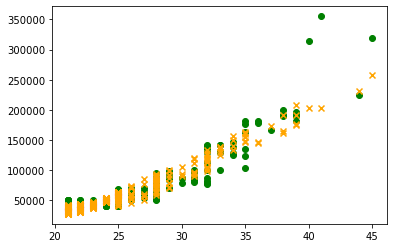

In [244]:
# plt.scatter(X_test['PAST EXP'],y_predict,color='red')
plt.scatter(X_test['AGE'], y_test, color='green', label='Test Data')
plt.scatter(X_test['AGE'], y_predict, color='orange', label='Predictions on Test Data', marker='x')
plt.show()

In [218]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train models and store them in a dictionary
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f'{name} model trained.')


Linear Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.


In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
decision_tree_pred = decision_tree_reg.predict(X_test)

# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
random_forest_pred = random_forest_reg.predict(X_test)

# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_reg.predict(X_test)

# Evaluate the models
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = mean_squared_error(true, pred, squared=False)
    r2 = r2_score(true, pred)
    return mae, mse, rmse, r2

models = {
    'Linear Regression': linear_reg_pred,
    'Decision Tree': decision_tree_pred,
    'Random Forest': random_forest_pred,
    'Gradient Boosting': gradient_boosting_pred
}

for name, pred in models.items():
    mae, mse, rmse, r2 = evaluate_model(y_test, pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


Linear Regression - MAE: 10578.145014982854, MSE: 234322991.88388216, RMSE: 15307.612220195617, R^2: 0.8127560942245526
Decision Tree - MAE: 6369.12036685642, MSE: 155513042.17331332, RMSE: 12470.486845881893, R^2: 0.8757319152446517
Random Forest - MAE: 5356.884790704551, MSE: 99682867.26545195, RMSE: 9984.13077165218, R^2: 0.9203449509772046
Gradient Boosting - MAE: 4805.359528568622, MSE: 69665841.52375843, RMSE: 8346.606587335864, R^2: 0.9443310954628557
